In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

In [2]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        if(args[file]["adaptive_n"]):
                            print(line)
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        # print(file_path)
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


 69%|██████▉   | 443/638 [00:00<00:00, 2252.39it/s]

Solved: True

Solved: True

Solved: True

Solved: True

Solved: True

Solved: True

Solved: False

./runs/prm-1--20240611-040524/170_1718093288.055405/1718093288.0605881.log
Solved: True

Solved: True



100%|██████████| 638/638 [00:00<00:00, 2198.02it/s]

Solved: True

Solved: True

Solved: True



In [3]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
print(args.keys())
for key in times:
    if(args[key]["adaptive_n"]):
        counter += 1
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

513
513
600
dict_keys(['1718104911.8362734.log', '1718104912.2980688.log', '1718104914.1012514.log', '1718104914.1006503.log', '1718104911.8685648.log', '1718104912.2642066.log', '1718104911.8142169.log', '1718104912.050698.log', '1718104914.101056.log', '1718104912.1477127.log', '1718104911.8650024.log', '1718104911.9704201.log', '1718104912.5143683.log', '1718104912.2635992.log', '1718104912.242243.log', '1718104911.5899804.log', '1718104912.0988188.log', '1718104912.4079692.log', '1718104912.1574547.log', '1718104912.0011096.log', '1718104912.413295.log', '1718104914.1002584.log', '1718104912.315634.log', '1718104912.3254464.log', '1718104911.8019505.log', '1718104913.2333038.log', '1718104912.0907187.log', '1718104911.980353.log', '1718104911.446444.log', '1718104914.1018484.log', '1718104912.0007873.log', '1718104911.879248.log', '1718104914.103075.log', '1718104912.1874099.log', '1718104911.487242.log', '1718104911.8371153.log', '1718104912.102016.log', '1718104914.1022851.log', 

12


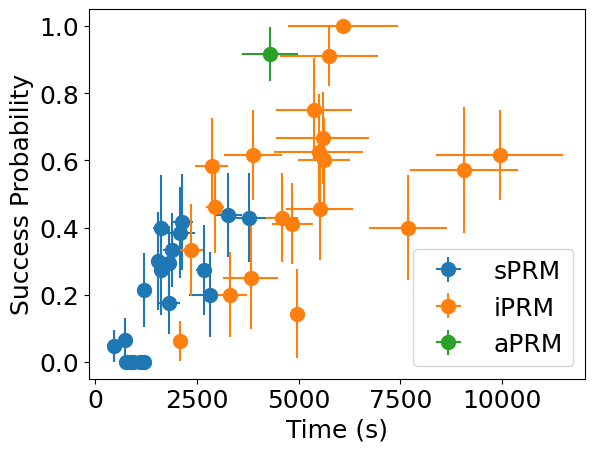

In [4]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('sample_plot.pdf', format='pdf',  bbox_inches='tight')